In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Load data from the CSV file
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Extract input (X) and output (y) data
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Function to normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    max_val = np.max(X)
    min_val = np.min(X)
    mean_val = np.mean(X)
    
    # Apply mean normalization
    X_normalized = (X - mean_val) / (max_val - min_val)
    
    # Add bias term (column of ones)
    X_b = np.c_[np.ones((N, 1)), X_normalized]
    
    return X_b, max_val, min_val, mean_val

# Perform mean normalization on input data
X_b, max_val, min_val, mean_val = mean_normalization(X)

In [6]:
import numpy as np

def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # Khởi tạo tham số (hoặc dùng np.random.randn cho ứng dụng thực tế)
    # thetas = np.random.randn(4, 1)  # Uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    # Lưu lịch sử các giá trị của thetas và hàm mất mát (loss)
    thetas_path = [thetas.copy()]
    losses = []

    # Số lượng mẫu dữ liệu
    N = X_b.shape[0]

    # Lặp qua từng epoch
    for epoch in range(n_epochs):
        # Compute output (Dự đoán)
        yi_hat = X_b.dot(thetas)

        # Compute loss (Tính hàm mất mát)
        loss = (yi_hat - y)**2

        # Compute derivative of loss (Đạo hàm của hàm mất mát)
        loss_gradient = 2*(yi_hat - y)/ N

        # Compute derivative of parameters (Đạo hàm theo tham số)
        gradients = X_b.T.dot(loss_gradient)

        # Update parameters (Cập nhật tham số)
        thetas = thetas - learning_rate * gradients

        # Lưu lại thetas mới và giá trị hàm mất mát
        thetas_path.append(thetas.copy())
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    # Trả về lịch sử của thetas và hàm mất mát
    return thetas_path, losses


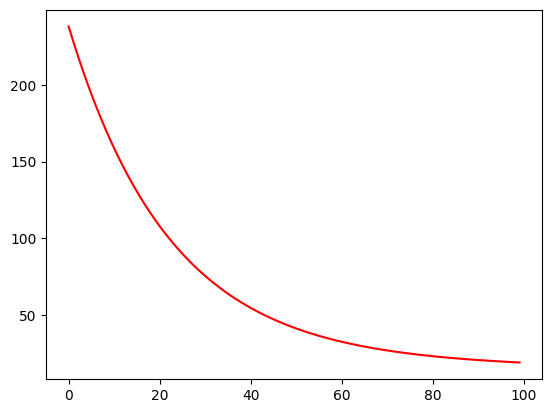

In [7]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)

x_axis = list(range(100))
plt.plot( x_axis, losses[:100], color ="r")
plt.show()

In [8]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)
print ( round ( sum( losses ) ,2) )

6716.46
